In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')
# sex F(0) 591 M(1) 453
# famsize GT3(0) 738 LE3(1) 306
# Pstatus A(0) 121 T(1) 923
# Mjob at_home(0) 194 health(1) 82 other(2) 399 service(3) 239 teacher(4) 130
# Fjob at_home(0) 62 health(1) 41 other(2) 584 service(3) 292 teacher(4) 65
# higher yes(1) 955 no(0) 89
# romantic yes(1) 371 no(0) 673

In [53]:
from sklearn.preprocessing import OrdinalEncoder
columns_name = ['sex', 'famsize', 'Pstatus', 'higher', 'romantic']
encoder = OrdinalEncoder()
df[columns_name] = encoder.fit_transform(df[columns_name])

In [54]:
selected_columns = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc', 'Walc']
df = df[selected_columns].copy()

In [55]:
#df = pd.get_dummies(df, columns=['Mjob', 'Fjob'])

In [56]:
#df.to_csv('./student-encoded.csv')

In [57]:
df

,sex,age,Pstatus,famrel,Medu,Mjob,Fedu,Fjob,goout,health,Dalc,Walc
0,0.0,18,0.0,4,4,at_home,4,teacher,4,3,1,1
1,0.0,17,1.0,5,1,at_home,1,other,3,3,1,1
2,0.0,15,1.0,4,1,at_home,1,other,2,3,2,3
3,0.0,15,1.0,3,4,health,2,services,2,5,1,1
4,0.0,16,1.0,4,3,other,3,other,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,19,1.0,5,2,services,3,other,2,5,1,2
1040,0.0,18,1.0,4,3,teacher,1,services,4,1,1,1
1041,0.0,18,1.0,1,1,other,1,other,1,5,1,1
1042,1.0,17,1.0,2,3,services,1,services,5,2,3,4


In [32]:
df['Dalc'] = df['Dalc'].astype(str)
print(df.dtypes)
df.to_csv('df.csv')

sex        float64
age          int64
Pstatus    float64
famrel       int64
Medu         int64
Mjob        object
Fedu         int64
Fjob        object
goout        int64
health       int64
Dalc        object
Walc         int64
dtype: object


In [33]:
X = df[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

yD = df['Dalc']
yW = df['Walc']
X.columns

Index(['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher'],
      dtype='object')

In [35]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import linear_model

selected = X[list(X.columns)]
interestCols = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
'''
names = pd.DataFrame(X.columns)
clf = linear_model.LinearRegression()

rfe_mod = RFECV(clf, cv=5, step=1)
selected_features = rfe_mod.fit(X,yW) 

feature_rank = pd.DataFrame(selected_features.ranking_)

ranked = pd.concat([names,feature_rank], axis=1)
ranked.columns = ["Feature", "Rank"]

ranked'''

'\nnames = pd.DataFrame(X.columns)\nclf = linear_model.LinearRegression()\n\nrfe_mod = RFECV(clf, cv=5, step=1)\nselected_features = rfe_mod.fit(X,yW) \n\nfeature_rank = pd.DataFrame(selected_features.ranking_)\n\nranked = pd.concat([names,feature_rank], axis=1)\nranked.columns = ["Feature", "Rank"]\n\nranked'

In [36]:
# Importing modules and libraries for our modeling
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [10]:
clf = linear_model.LogisticRegression(max_iter=3000)
sfs = SequentialFeatureSelector(clf, n_features_to_select=10, scoring='accuracy', cv=None)
features = sfs.fit(X,yD)

X_train, X_test, y_train, y_test = train_test_split(features.transform(X), yD, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred)) #0.7416267942583732

              precision    recall  f1-score   support

           1       0.75      0.99      0.86       151
           2       0.50      0.10      0.17        39
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8

    accuracy                           0.74       209
   macro avg       0.45      0.25      0.26       209
weighted avg       0.67      0.74      0.66       209


/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [12]:
clf = linear_model.LogisticRegression(max_iter=3000)
sfs = SequentialFeatureSelector(clf, n_features_to_select=10, scoring='accuracy', cv=None)
features = sfs.fit(X,yW)

#X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features.transform(X), yW, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_pred)
print(accuracy_score(y_test, y_pred)) #0.4784688995215311
print(f1_score(y_test, y_pred, average='micro'))

[4 4 1 1 1 1 3 1 1 1 1 3 1 4 1 1 5 3 1 4 1 1 1 1 1 3 4 1 3 1 4 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 3 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 4 1 4 3 1 1 1 3 3
 1 4 1 5 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 5 1
 3 1 1 1 1 1 1 1 3 4 1 1 1 1 1 3 1 1 4 1 1 1 5 5 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1
 4 1 1 5 1 1 1 1 1 4 1 1 1 4 1 1 1 5 1 1 1 1 1 1]
0.4784688995215311


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [86]:
from sklearn import svm

clf = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print
print(classification_report(y_test, y_pred))

['2' '1' '1' '2' '2' '4' '3' '1' '3' '2' '1' '1' '1' '1' '3' '2' '2' '1'
 '1' '1' '2' '1' '2' '1' '1' '1' '1' '1' '1' '2' '1' '2' '2' '1' '2' '1'
 '1' '1' '1' '2' '1' '1' '1' '3' '5' '1' '1' '5' '1' '1' '1' '5' '1' '2'
 '1' '1' '2' '1' '1' '1' '2' '5' '1' '3' '2' '2' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '5' '1' '1' '3' '5' '3' '1' '1' '2' '1' '1' '1'
 '1' '2' '1' '1' '1' '1' '4' '1' '1' '1' '1' '1' '1' '3' '1' '1' '2' '2'
 '1' '5' '2' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '2' '1'
 '1' '1' '1' '1' '2' '1' '2' '4' '1' '1' '1' '1' '1' '3' '1' '1' '4' '5'
 '1' '3' '5' '4' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1'
 '1' '1' '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '2' '1' '2' '1' '2' '1'
 '1' '1' '1' '3' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '2' '1' '2' '2' '1' '1' '1' '2' '1' '1']
              precision    recall  f1-score   support

           1       0.93      0.89      0.91       153
           2       0.76      0.81      0.7

In [89]:
print(np.array(y_test))

['2' '1' '1' '2' '1' '1' '3' '1' '3' '2' '1' '1' '1' '1' '3' '2' '2' '1'
 '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '2' '1'
 '1' '1' '1' '2' '1' '1' '2' '1' '4' '1' '1' '1' '1' '1' '1' '2' '1' '1'
 '1' '5' '2' '1' '1' '1' '1' '5' '1' '3' '2' '2' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '5' '1' '1' '3' '5' '3' '1' '1' '1' '1' '1' '1'
 '1' '2' '1' '1' '1' '3' '1' '1' '1' '1' '2' '1' '1' '3' '1' '1' '2' '2'
 '1' '5' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '2' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '5'
 '1' '3' '4' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1'
 '2' '1' '1' '2' '1' '1' '1' '2' '1' '2' '1' '1' '2' '1' '2' '1' '2' '1'
 '1' '1' '1' '3' '5' '1' '1' '1' '1' '1' '1' '2' '2' '1' '1' '1' '1' '1'
 '1' '2' '4' '2' '2' '1' '1' '1' '2' '1' '1']


In [91]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))

0.8564593301435407
0.8564593301435407
0.8564593301435407


In [82]:
from sklearn import svm

clf = svm.SVC(C=1, kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=80)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        81
           2       0.67      0.69      0.68        49
           3       0.67      0.62      0.64        39
           4       0.88      0.76      0.81        29
           5       0.60      0.55      0.57        11

    accuracy                           0.74       209
   macro avg       0.72      0.69      0.71       209
weighted avg       0.74      0.74      0.74       209


In [94]:
print(accuracy_score(y_test, y_pred)) 
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.9138755980861244
0.9068803400324182
0.9138755980861244


In [38]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly', 'rbf']}

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, refit=True, verbose=3, n_jobs=10)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [92]:
model = XGBClassifier(n_estimators=300, max_depth=12, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1)

X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=30)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred)) #0.9138755980861244

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       153
           2       0.83      0.81      0.82        36
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         3
           5       0.83      0.71      0.77         7

    accuracy                           0.91       209
   macro avg       0.67      0.68      0.67       209
weighted avg       0.90      0.91      0.91       209


/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [79]:
model = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.05, objective='multi:softmax', booster='gbtree', min_child_weight=1, sampling_method='uniform')
### difference between multi:softmax and reg:log???

X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=80)
# Transform the labels [1,2,3,4,5] to [0,1,2,3,4] in order to fit the model
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
accuracy_score(y_test, y_pred) #0.7703349282296651

0.7703349282296651

<Axes: >

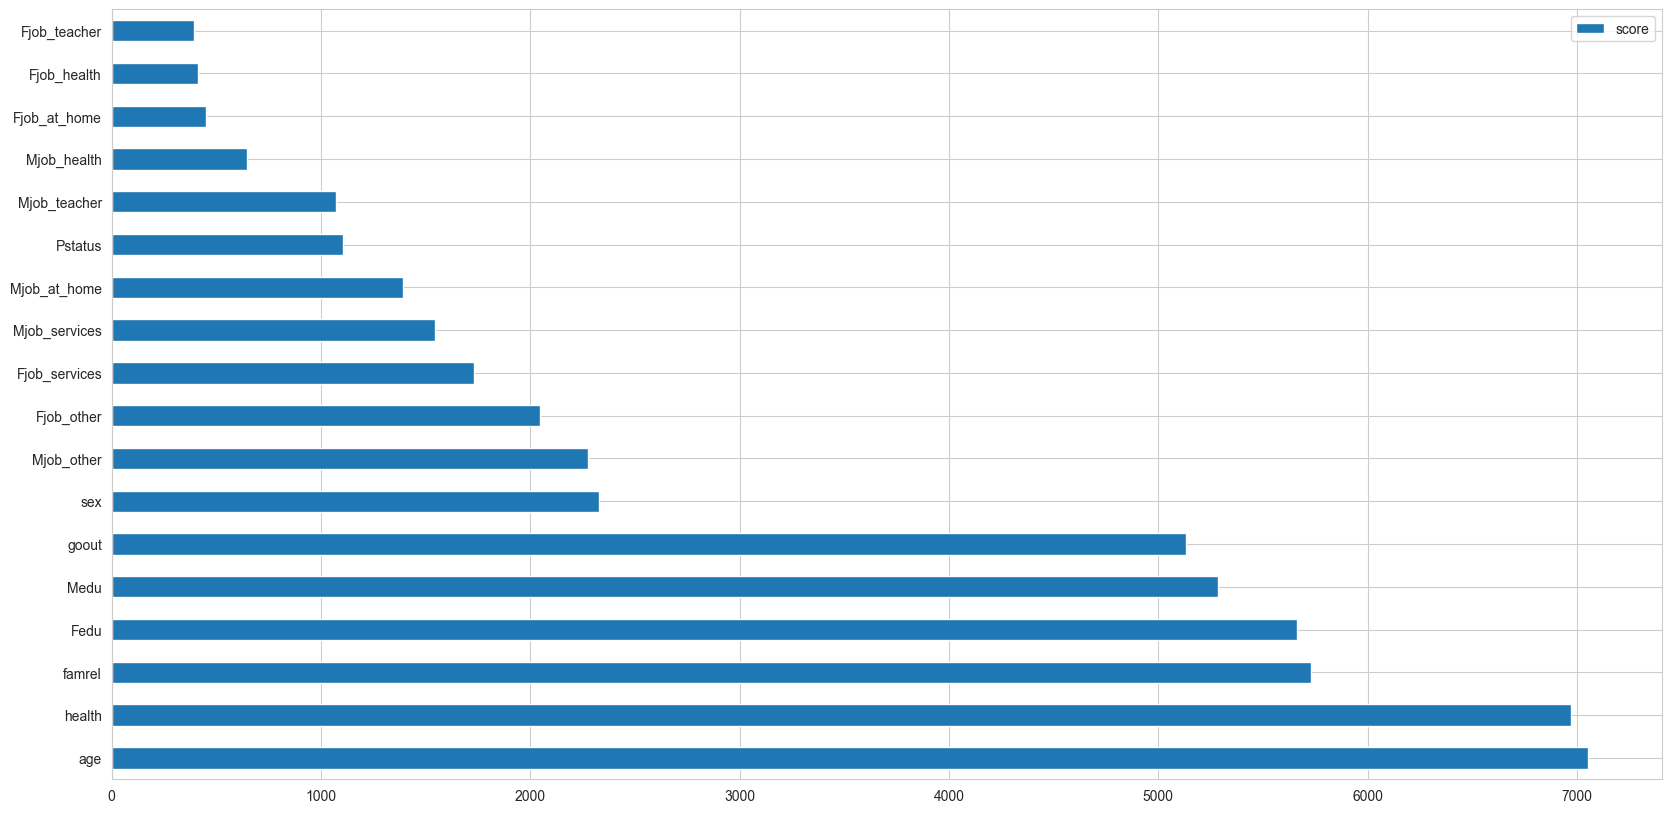

In [51]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [ ]:
# Use Grid Search CV to find the best parameters for xgboost model
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

xgbc = XGBClassifier()
y_train = le.fit_transform(y_train)
#clf = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
grid_search = GridSearchCV(
    estimator=xgbc,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 5,
    verbose=True,
)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2803e120-7517-421e-b340-ad1aa2504552' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>